<a href="https://colab.research.google.com/github/syma-afsha/Multi_Arm_Bandit_epsilion_greedy_action_value/blob/main/Non_stationary_vs_stationary_using_constant_and_not_constant_step_size.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Non stationary vs stationary**


***Stationary:***The reward probabilities don't change over time.
**Example:**
Imagine a slot machine (one-armed bandit) with a fixed true reward:

True mean reward:
3.0

Rewards are sampled from a normal distribution with mean
3.0
 and standard deviation
1.0.

***Each arm of a multi-armed bandit problem always has the same mean reward.***

- Use a decaying step size (
𝛼
 =1/n), which gives equal weight to all rewards over time.

***Non-Stationary:***The reward probabilities change over time.

Imagine the slot machine’s true mean reward changes halfway through the simulation:

From
𝑄
∗
=
3.0
(steps 1–500) to
𝑄
∗
=
5.0
 (steps 501–1000).
Rewards are sampled from a normal distribution with the current mean and standard deviation
1.0.

-Use a constant step size (
𝛼
α) to prioritize recent observations.








In [ ]:
import numpy as np

class BanditProblem:
    def __init__(self, true_value, epsilion, total_steps, step_size=None, non_stationary=False, change_interval=None, change_magnitude=None):
        """
        Initialize the Bandit Problem.
        - true_value: Array of true mean rewards for each arm.
        - epsilon: Probability of exploration.
        - total_steps: Total number of timesteps.
        - step_size: Step size for updating the mean reward (constant or None for decaying step size).
        - non_stationary: If True, the reward distribution changes over time.
        - change_interval: Number of steps between changes in true values.
        - change_magnitude: Magnitude of the random changes applied to true values.
        """
        self.true_value = true_value
        self.epsilion = epsilion
        self.arm_number = len(true_value)
        self.total_steps = total_steps
        self.current_step = 0
        self.step_size = step_size
        self.non_stationary = non_stationary
        self.change_interval = change_interval
        self.change_magnitude = change_magnitude

        # Tracking variables
        self.how_many_time_particular_arm_is_selected = np.zeros(self.arm_number)
        self.arm_mean_rewards = np.zeros(self.arm_number)
        self.mean_reward = np.zeros(total_steps + 1)
        self.arm_mean_rewards_history = np.zeros((self.arm_number, total_steps + 1))

    def update_true_values(self):
        """
        Dynamically update the true reward values for a non-stationary environment.
        """
        if self.non_stationary and self.current_step % self.change_interval == 0 and self.current_step>0:
            self.true_value += np.random.normal(0, self.change_magnitude, self.arm_number)


            print(f"Step {self.current_step}:New values: {self.true_value}")
            print(f"Mean Reward {self.mean_reward}")

    def select_action(self):
        """
        Select an arm using epsilon-greedy strategy and update rewards.
        """
        # Epsilon-greedy action selection
        probability = np.random.rand()
        if probability < self.epsilion:
            selected_index = np.random.choice(self.arm_number)  # Exploration
        else:
            selected_index = np.argmax(self.arm_mean_rewards)  # Exploitation

        # Simulate the reward for the selected arm
        reward = np.random.normal(self.true_value[selected_index], 1)

        # Determine step size
        if self.step_size is not None:
            step_size = self.step_size  # Constant step size
        else:
            # Decaying step size
            self.how_many_time_particular_arm_is_selected[selected_index] += 1
            step_size = 1 / self.how_many_time_particular_arm_is_selected[selected_index]

        # Update the estimated mean reward for the selected arm
        self.arm_mean_rewards[selected_index] += step_size * (reward - self.arm_mean_rewards[selected_index])

        # Update the overall mean reward
        self.mean_reward[self.current_step + 1] = self.mean_reward[self.current_step] + (
            1 / (self.current_step + 1)) * (reward - self.mean_reward[self.current_step])

        # Track the history of mean rewards for the selected arm
        self.arm_mean_rewards_history[:, self.current_step] = self.arm_mean_rewards

    def play_game(self):
        """
        Play the bandit game for the specified number of timesteps.
        """
        for t in range(self.total_steps):
            self.current_step = t
            self.update_true_values()
            self.select_action()


In [ ]:
true_value=[1,2,7,8,-1,3] #6 arms action value

"""Stationary Environment"""
bandit_stationary=BanditProblem(true_value,epsilion=0.1, step_size=None,total_steps=100000, non_stationary=False)
bandit_stationary.play_game()
print(bandit_stationary.mean_reward)





[0.         2.4327948  1.65178699 ... 7.53401252 7.53402244 7.53404577]


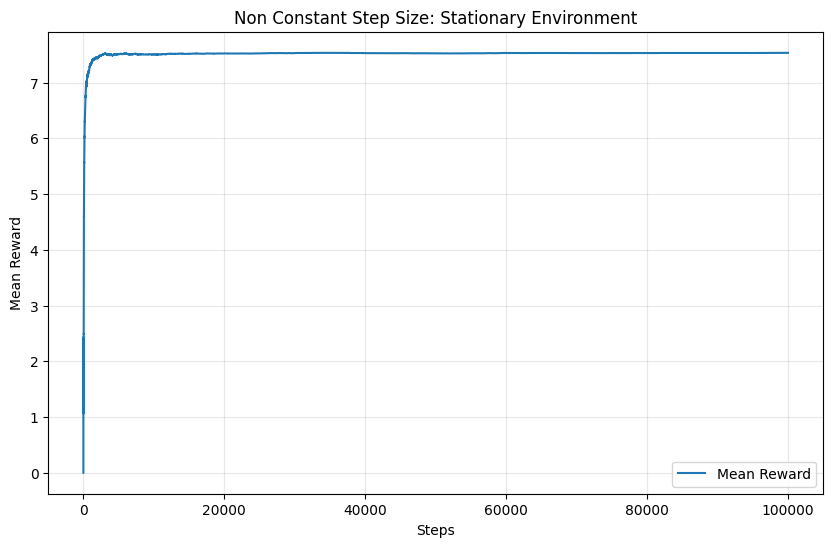

In [ ]:

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
# for i in range(len(true_value)):
#   plt.axhline(true_value[i], color="gray", linestyle="--", label=f"True Value {i}")
#   plt.plot(bandit_stationary.arm_mean_rewards_history[i], label=f"Arm {i}")
plt.plot(bandit_stationary.mean_reward, label="Mean Reward")

plt.xlabel("Steps")
plt.ylabel("Mean Reward")
plt.title("Non Constant Step Size: Stationary Environment")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


In [ ]:
# Constant Step Size
"""Non Stationary Environment"""
bandit_non_stationary=BanditProblem(true_value,epsilion=0.1, step_size=0.5,total_steps=100000, non_stationary=True, change_interval=2000, change_magnitude=1.0)
bandit_non_stationary.play_game()
print(bandit_non_stationary.mean_reward)

Step 2000:New values: [ 1.51935118  1.00763837  7.84174548  8.5845251  -0.94833259  3.89531772]
Mean Reward [0.         0.29652413 0.29931423 ... 0.         0.         0.        ]
Step 4000:New values: [ 2.39964512  2.00054579  8.040911    8.80402197 -0.85567253  2.12022731]
Mean Reward [0.         0.29652413 0.29931423 ... 0.         0.         0.        ]
Step 6000:New values: [ 3.78170664  4.4785746   8.27739269  8.91825246 -0.16232758  1.49586857]
Mean Reward [0.         0.29652413 0.29931423 ... 0.         0.         0.        ]
Step 8000:New values: [ 2.96644022  3.27525343  8.46423638  9.31557194 -0.59130865  1.66971621]
Mean Reward [0.         0.29652413 0.29931423 ... 0.         0.         0.        ]
Step 10000:New values: [2.0087952  3.13231858 5.77509414 8.73832914 1.74506915 1.44697545]
Mean Reward [0.         0.29652413 0.29931423 ... 0.         0.         0.        ]
Step 12000:New values: [2.64018213 2.9829588  5.6344207  9.63913335 1.53728964 1.92598844]
Mean Reward [0

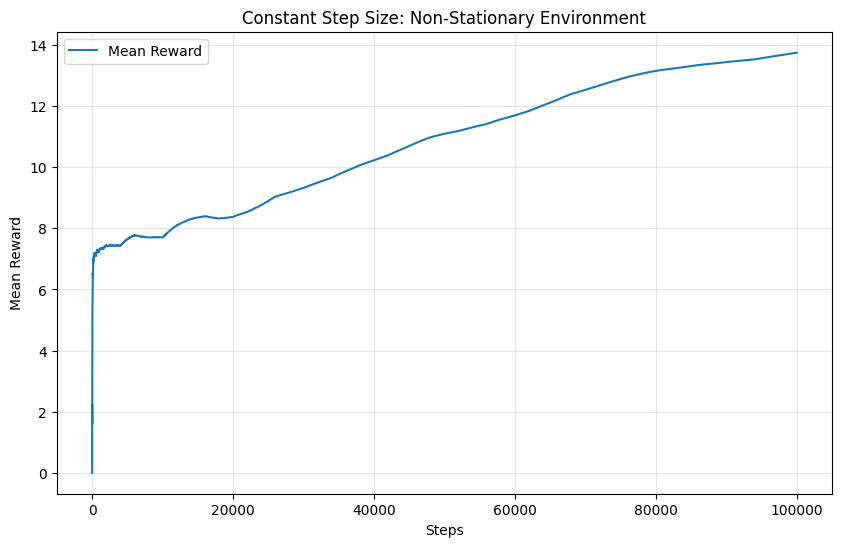

In [ ]:

# Plot mean reward for non-stationary environment
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(bandit_non_stationary.mean_reward, label="Mean Reward")
plt.xlabel("Steps")
plt.ylabel("Mean Reward")
plt.title("Constant Step Size: Non-Stationary Environment")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


Step 2000:New values: [ 0.25735866  4.69266045  9.02592086  6.79598687 -2.63777463  3.63996775]
Mean Reward [ 0.         -0.75881513  0.94911849 ...  0.          0.
  0.        ]
Step 4000:New values: [ 0.78061046  4.52405727  9.21878077  5.88065328 -3.77071177  1.68651927]
Mean Reward [ 0.         -0.75881513  0.94911849 ...  0.          0.
  0.        ]
Step 6000:New values: [ 1.74447618  4.64098153  9.25477695  5.4749226  -2.90504984  2.60617589]
Mean Reward [ 0.         -0.75881513  0.94911849 ...  0.          0.
  0.        ]
Step 8000:New values: [ 1.24329076  3.53593464  7.36518565  5.04646631 -4.14995021  2.00451762]
Mean Reward [ 0.         -0.75881513  0.94911849 ...  0.          0.
  0.        ]
Step 10000:New values: [-0.06220583  3.61651006  8.96445892  5.54269841 -4.84768969  0.61478538]
Mean Reward [ 0.         -0.75881513  0.94911849 ...  0.          0.
  0.        ]
Step 12000:New values: [-0.42241857  2.59188233  8.47179299  4.14240287 -6.21144592  1.96125192]
Mean Re

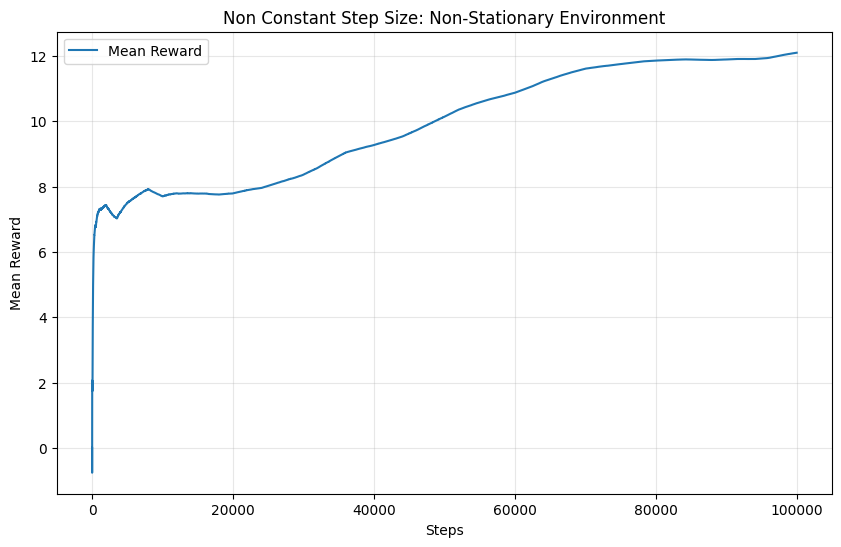

In [ ]:
bandit_non_stationary_decaying=BanditProblem(true_value,epsilion=0.1, step_size=None,total_steps=100000, non_stationary=True, change_interval=2000, change_magnitude=1.0)
bandit_non_stationary_decaying.play_game()

plt.figure(figsize=(10, 6))
plt.plot(bandit_non_stationary_decaying.mean_reward, label="Mean Reward")
plt.xlabel("Steps")
plt.ylabel("Mean Reward")
plt.title("Non Constant Step Size: Non-Stationary Environment")
plt.legend()
plt.grid(alpha=0.3)
plt.show()



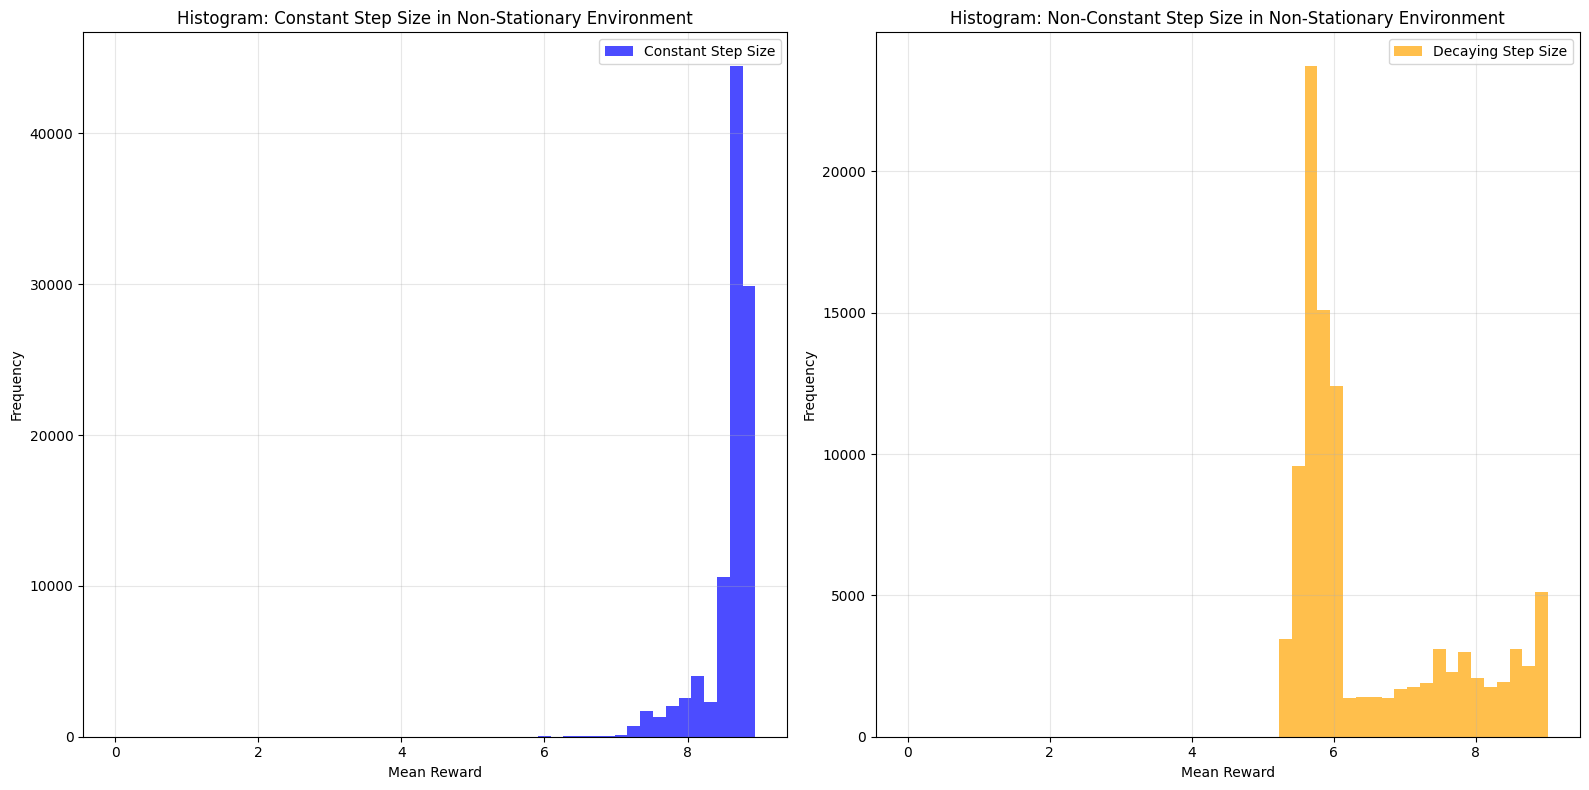

In [ ]:
# Plot histograms for constant and decaying step sizes
plt.figure(figsize=(16, 8))

# Histogram for constant step size
plt.subplot(1, 2, 1)
plt.hist(bandit_non_stationary.mean_reward, bins=50, color='blue', alpha=0.7, label="Constant Step Size")
plt.xlabel("Mean Reward")
plt.ylabel("Frequency")
plt.title("Histogram: Constant Step Size in Non-Stationary Environment")
plt.legend()
plt.grid(alpha=0.3)

# Histogram for decaying step size
plt.subplot(1, 2, 2)
plt.hist(bandit_non_stationary_decaying.mean_reward, bins=50, color='orange', alpha=0.7, label="Decaying Step Size")
plt.xlabel("Mean Reward")
plt.ylabel("Frequency")
plt.title("Histogram: Non-Constant Step Size in Non-Stationary Environment")
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

In the right graph, a narrower distribution as the decaying step size reduces the influence of recent rewards, causing the agent to lag behind changes in the environment.


In the left graph, constant step size quickly adapts to changing true values, resulting in a wider range of mean rewards.